# Table of Content <a id='toc'></a>


&nbsp;&nbsp;&nbsp;&nbsp;[1. correlation](#0)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.1. Pearson's (linear) correlation](#1)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.2. Spearman's (rank) correlation coefficient](#2)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.3. Significance of Pearson and Spearman correlation coefficient.](#3)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Kendall tau correlation coefficient (for fun)](#4)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 01](#5)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Correlation and causation](#6)

&nbsp;&nbsp;&nbsp;&nbsp;[2.Linear regression](#7)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.1.Presentation](#8)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.2.Underlying hypothesis](#9)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Goodness of fit](#10)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.4. Confidence interval and test statistics](#11)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.5. Maximum Likelihood](#12)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.6. Model choosing](#13)

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[2.7. What to do when some hypothesis about OLS are not true](#14)

&nbsp;&nbsp;&nbsp;&nbsp;[Exercise 02](#15)

In [1]:
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import scipy.stats as stats 
import pandas as pd
import numpy as np

from matplotlib import collections  as mc
from operator import itemgetter
from mpl_toolkits.mplot3d import Axes3D


So far we have seen how to evaluate the relationship between
* 2 categorical variables (fisher's exact test, chi-square)
* 1 quantitative and a categorical variable (t-test, anova)

Now we are going to see how to relate 2 quantitative variables together.

In this notebook we will use the folloming dataset:

In [2]:
df=pd.read_csv('data/etubiol.csv')
df.rename(columns={i:i.replace('.','_') for i in df.columns},inplace=True)
df.eye_colour = df.eye_colour.astype(str) # making eye colour a non-numerical variable
df.diet = df.diet.astype(str) # making diet a non-numerical variable
df

,gender,height,weight,shoe_size,right_left_handed,smoker_nonsmoker,hair_colour,eye_colour,R_wrist_girth,L_wrist_girth,nb_siblings,birth_place,height_M,height_F,nb_siblings_F,nb_siblings_M,diet
0,M,183,72,42.0,R,NS,lb,1,17.0,16.6,2,vd,170,174,5,1,4
1,M,183,68,43.0,R,NS,db,2,17.0,16.0,1,fr,170,178,4,2,2
2,M,182,73,44.0,R,NS,bl,1,18.5,18.0,2,ne,168,181,3,5,4
3,M,175,66,41.0,L,NS,db,2,17.0,17.0,2,vd,156,178,4,7,1
4,M,158,42,41.0,R,NS,db,2,14.0,14.0,2,vd,156,178,4,7,1
5,M,179,70,47.0,R,S,db,2,16.0,16.0,1,vd,150,190,1,0,4
6,F,172,61,38.0,L,NS,lb,1,15.3,15.0,2,vd,168,186,2,4,2
7,M,185,69,44.0,R,NS,db,2,16.5,15.0,1,vd,172,167,4,0,3
8,M,177,75,43.0,R,S,db,2,17.0,16.3,1,fr,161,169,3,2,3
9,F,165,50,37.0,R,NS,db,3,15.0,15.0,3,vd,163,175,1,3,1


From which we would like to model the height of individuals given the following informations : 

In [3]:
for s in set(df.columns)-set(['height']):
    print(s)

R_wrist_girth
shoe_size
height_F
nb_siblings
eye_colour
smoker_nonsmoker
gender
L_wrist_girth
hair_colour
height_M
nb_siblings_M
nb_siblings_F
weight
birth_place
diet
right_left_handed


In [4]:
df.dtypes

gender                object
height                 int64
weight                 int64
shoe_size            float64
right_left_handed     object
smoker_nonsmoker      object
hair_colour           object
eye_colour            object
R_wrist_girth        float64
L_wrist_girth        float64
nb_siblings            int64
birth_place           object
height_M               int64
height_F               int64
nb_siblings_F          int64
nb_siblings_M          int64
diet                  object
dtype: object


[back to the toc](#toc)

<br>

# 1. correlation   <a id='0'></a>

Correlation is a measure of the amount of relatedness between two measured variables.

A correlation measure typically goes from -1 (anti-correlation) to 1 (correlation), where 0 is the absence of correlation (independence).

When two variables show a very large correlation, one can be said to be a **predictor** of the other, in the sense that knowing the value of one of the two variable allows us to make a reasonnable guess about the value of the second variable.
Another way of looking at this relationship is to see those variable as **redundant**, in the sense that they carry the same information : knowing the value of both variable does not bring much more insight compared to knowing the value of only one.



[back to the toc](#toc)

<br>

## 1.1. Pearson's (linear) correlation  <a id='1'></a>


Given 1 sample where each individual $i$ has 2 measures $x_i$ and $y_i$, Pearson's correlation coefficient between $x$ and $y$ is : 

$$r_{x,y} = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum(x_i - \bar{x})^2}\sqrt{\sum(y_i - \bar{y})^2}}$$

A way to look at this formula is that $r_{x,y}$ tends to move away from zeros when points for which $x_i$ is very different from its mean corresponds to points for which $y_i$ is also very different from its mean. Thus, we are looking for an association in the variation of the variables, which is why Pearson correlation coefficient is also defined as a **standardized covariance** of the two variables.

Pearson's correlation coefficient measures the **linear correlation** between variables, which means that its value is only relevant for the evaluation of a linear relationship. In other words, **two variables can have a strong relationship (i.e. be correlated) but display a Pearson's coefficient of correlation equal to 0**.


![Correlation_examples2](images/Correlation_examples2.png)
> Image by DenisBoigelot, released into the public domain (CC0 license)

This emphasises the danger of relying on a single number for representing sometimes complex notions and the 
importance of always representing visually the variables you want to describe.

Another (fun) example is the [datasaurus dozen](https://www.autodeskresearch.com/publications/samestats) :

![DinoSequentialSmaller.gif](images/DinoSequentialSmaller.gif)


[back to the toc](#toc)

<br>

## 1.2. Spearman's (rank) correlation coefficient  <a id='2'></a>

Spearman's correlation coefficient corresponds to Pearson's correlation coefficient, but on the **ranks** of observations rather than their values.

Spearman correlation coefficient is used to describe the correlation between two variables when their relation is *monotonic* (i.e. it goes in a single direction: if it is increasing it is always increasing, it never goes down) but non linear (e.g. an exponential relationship)

The formula to calculate the Spearman's rank correlation coefficients  between two random variables **X** and **Y** associated to n individual drawns is:

$$\rho=1-\frac{\sum d_{i}^{2}}{n^{3}-n}$$

Where i is the individual number, n the number of individuals and $d_i$ defined as follow :

$d_i=rank(x_i)-rank(y_i)$

Where of course $x_i$ and $y_i$ are the realization of **X** and **Y** for individual i.

It is easy to calculate pearson and spearman coeffcient using the scipy.stats library (in the following code abbreviating by stats) followed by either `pearsonr` or `spearmanr`. Both take two lists or arrays as a input and return an array comprised of the coefficient and the p-values.

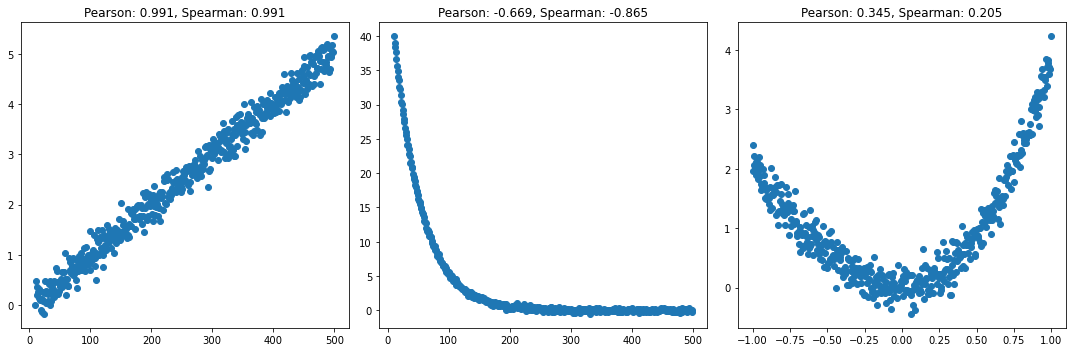

In [5]:
sigma=1./5

linear=[[u,(u)/100+sigma*np.random.randn()] for u in range(10,500)]
monotonic=[[u,50*(0.8**(u/10))+sigma*np.random.randn()] for u in range(10,500)]

non_monotonic=[[u,(u)**3+3*u**2+sigma*np.random.randn()] for u in np.arange(-1,1,1./250)]

together=[linear,monotonic,non_monotonic]
plt.subplots(133,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    x=[u[0] for u in together[i]]
    y=[u[1] for u in together[i]]
    plt.scatter(x,y)
    plt.title('Pearson: {0:.3f}, Spearman: {1:.3f}'.format(
                                    stats.pearsonr(x,y)[0],##just like that
                                    stats.spearmanr(x,y)[0]))
plt.tight_layout()    
plt.show()


Going back to our real dataset 

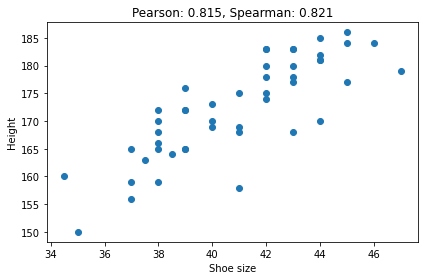

In [6]:
x=df['shoe_size']
y=df['height']
plt.scatter(x,y)
plt.title('Pearson: {0:.3f}, Spearman: {1:.3f}'.format(
                                    stats.pearsonr(x,y)[0],##just like that
                                    stats.spearmanr(x,y)[0]))
plt.xlabel('Shoe size')
plt.ylabel('Height')
plt.tight_layout()    
plt.show()



[back to the toc](#toc)

<br>

## 1.3. Significance of Pearson and Spearman correlation coefficient.  <a id='3'></a>


There are 3 main ways to evaluate the significance of $\rho$ (the coefficient of correlation) compared to zero. The most straighforward rely on a t-test to evaluate if $\rho$ is significantly different from 0.

Following a permutation  argument (so looking at a null model where you break data correlation/class by creating all the possible arrangements of your data), you can rationalize the usage of the following test statistic :

$$t=\rho\sqrt{\frac{n-2}{1-\rho^2}}$$

which follow a Student's t-distribution under the null hypothesis that $\rho=0$.


The other two ways to evaluate the significance of $\rho$ are :

- Do the permutation test yourself
- Transform the data using Fisher transformation ($F(\rho)=arctanh(\rho)$) to calculate a z variable (instead of a t-student variable), which is normally distributed under $H_0$ : $z=\sqrt{\frac{n-3}{1.06}}F(\rho)$


[back to the toc](#toc)

<br>

## 1.4 Kendall tau correlation coefficient (for fun)  <a id='4'></a>


You have already seen that you could define a correlation coefficient in multiple manners using multiple metrics : multiplicative distances to the means for Pearson, ranking distances between the two random variables for Spearman. For completness let's rapidly present another way to measure correlation : Kendall tau.

Kendal tau is based on the concept of concordant or discordant pairs. A concordant pair is a pair of individual i and j, $i<j$, for which the order relation between the two random variables stands : either $x_i>x_j$ and $y_i>y_j$ or $x_i<x_j$ and $y_i<y_j$. Discordant pairs have opposite signs between x and y.

The coefficient is defined as follow:

$$\tau=\frac{\text{number of concordant pairs}-\text{number of discordant pairs}}{\frac{n(n-1)}{2}}$$

Obviously this coefficient is comprised between -1 and 1, 0 meaning no correlation (indeed there is a total of $\frac{n(n-1)}{2}$ unique pairs).

A rank version also exists (which is mathematically equivalent to the expression above):

$$\tau_{rank}=\frac{2}{n(n-1)}\sum_{i<j} sgn(x_i-x_j)sgn(y_i-y_j)$$

Both the Spearman and and Pearson correlation coefficent are relying on distances, which means they are sensitive to the intensity of the error term and to outliers.  Kendall tau is way less influenced by the scale of the variability since it relies only on an order relation.







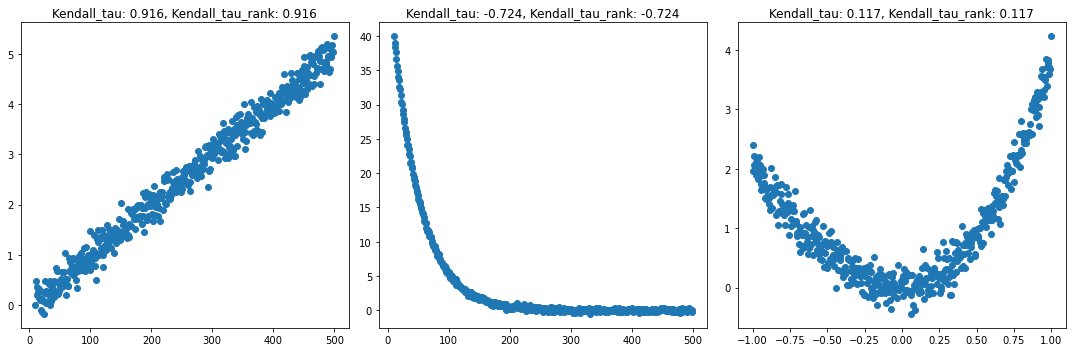

In [7]:
plt.subplots(133,figsize=(15,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    x=[u[0] for u in together[i]]
    y=[u[1] for u in together[i]]
    plt.scatter(x,y)
    plt.title('Kendall_tau: {0:.3f}, Kendall_tau_rank: {1:.3f}'.format(
                            stats.kendalltau(x,y)[0],
                            stats.mstats.kendalltau(x,y)[0]))
plt.tight_layout()    
plt.show()


[back to the toc](#toc)

<br>

# Exercise 01  <a id='5'></a>

Given the *etubiol* dataset, rank the best correlators of *height*.

Among these, which seem redundant to you (because of a high correlation)?

> If you work with a panda dataframe you can use (or not) the functionality `DataFrame.corr()` to calculate the pearson correlation between all the variable of the dataframe

In [16]:
# %load solutions/solution_04_corr.py

In [15]:
# %load solutions/solution_04_more.py


[back to the toc](#toc)

<br>

## 1.5 Correlation and causation  <a id='6'></a>

"Correlation does not equal causation" is one of these [often](https://xkcd.com/552/) [repeated](https://www.explainxkcd.com/wiki/index.php/925:_Cell_Phones) [sentence](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation), but it is still true nonetheless.

Observing that A and B are correlated (linearly or otherwise) gives you **no information** about whether A causes B or B causes A. One may not cause the other at all (they might both be caused by another [unidentified process](https://xkcd.com/1138/)!).

Furthermore, even if a coefficient of correlation if very high, it might still be completely [spurious](https://www.tylervigen.com/spurious-correlations).

![spurious](images/spurious_chart.png)

It is thus important to always shed a critical eye on correlations and the conclusion we could be tempted to draw from them.


[back to the toc](#toc)

<br>

# 2.Linear regression  <a id='7'></a>


Now that we have defined correlation, we can see further ways to characterise the relationship between two variables.

The problem we are interested in is the following:

We measured a bunch of variables per individual, for many individuals. We are interested in the relationship between one of this variable that we will call the *response variable* ($Y$) and the other variables that we will call *covariables* ($X$). 
Of course our measurments are not perfect so there is some noise associated to it ($\epsilon$). In mathematical term we are interested in a class of problem that we can write as :

$\pmb{Y}=f(\pmb{X})+\epsilon$

The function $f$ is called the regression function, and today we will be interested in looking at a particular form of those function: **linear combination**.

A particular case of linear combination would be a single covariable with an intercept like :

$y_i=\beta x_i+c$

![linear_model1.png](images/linear_model1.png)

A more general case would have more covariables and would be written like:

$$f(\textbf{X}_i,\pmb{\beta})=\sum_{p} \beta_p x_{i,p}= \textbf{X}_{i}^{T}\pmb{\beta}$$

Where *$X_i$* is a vector of p covariables associated to point individual i.

Note that for now nothing is said about the nature of the $x_{i,p}$, for example some could be constant instead of being a variable and thus you could go back to a more specific affine function (like $\beta x+c$).

So of course now the game become to best choose the vector of parameters $\pmb{\beta}$. For that there are two main methods (sorry Bayesian people...):
- Least Square fit
- Maximum Likelihood

We will discuss both those methods. Least square fit is the most intuitive and easy to get a hold on, so hopefully you will leave this class with a rather good understanding of it. Maximum likelihood is a bit more advanced in terms of the concepts it utilizes, but being introduce to it will allow you to manipulate cool concepts that you will need by the end of this notebook and if you keep learning about statistics in general. 

Underlying those different methods, there are different models:

- Linear models
- Generalized linear models

The way we wrote the function linking $Y$ to $X$ above, have the noise term $\epsilon$ outside of the function. So one would say that this function only try to represent the mean of the response variable $Y$ along the curve, and as importantly, it does it looking at linear function. 
. This is what we actually do in the framework of Linear models : we only aim to fit the mean response using linear funcitons.

Generalized linear model, in another hand, are more flexible : they allow us to transform the mean response and to fit that transformed response with a linear model. It is very powerfull, as now we could better modeled response variable with broader properties (count data, catgorical data etc....), but significantly more complicated and so we will not talk about those methods here.


# Least square


[back to the toc](#toc)

<br>

## 2.1.Presentation  <a id='8'></a>


For clarity let's define once for all some variables : we have a sample of size n, for each individual on this sample there are p+1 measurments, p covariables and one response variable. 

In the least square method we are interested in making the smallest overall distance error between our model and the response variable. 
Typically we want to find the $\beta$ that minimizes:

$S(\pmb\beta)=\sum_i (y_i-f(\textbf{X},\pmb{\beta}))^2=\sum_i \epsilon_i^2$

in mathematical terms you are looking for 

$\hat{\pmb\beta}=\text{arg min}_{\pmb\beta}S(\pmb\beta)$

Here the sum is over i, which counts the number of individuals.

> The hat $\hat{.}$, is a notation we use to denote our estimate of the true value of something. So in that sense $\hat{\pmb\beta}$ is the estimate of the "real" coefficient values, and $\hat{Y}$ is the estimation of $Y$ given by our model (also called the model predictions).

Let's try to represent this:

First a real case scenario just to show case the outcome of what we are trying to do ultimately

Basically we want to end up with thefollowing graph and outputs.

slope also called beta in our notation=  2.4323792016806713
intercept also called c in our notation=  72.89751838235297


Text(0, 0.5, 'height')

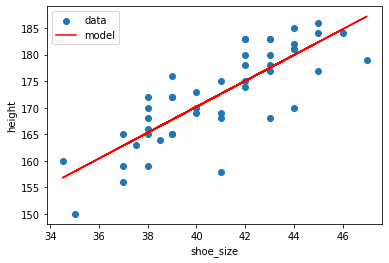

In [12]:
x=df['shoe_size']
y=df['height']


plt.scatter(x,y,label='data')
slope , intercept , r , pval , stderr = stats.linregress(x,y)
#linear regression explaining y (height) thanks to x (shoe_size)

print(r"slope also called beta in our notation= ",slope)
print("intercept also called c in our notation= ",intercept)

#now that we have the outcome iof the regression which is in this case a slope and
#an intercept we can calulate what the model will predict as height given a shoe_size
yPredict = x * slope + intercept 
#the outcome of the regression is this red line
plt.plot( x , yPredict , color = 'red',label='model')
plt.legend(loc='best')
plt.xlabel('shoe_size')
plt.ylabel('height')

What does Least square method do to end up with this line? Well let's see it on some simple mock data

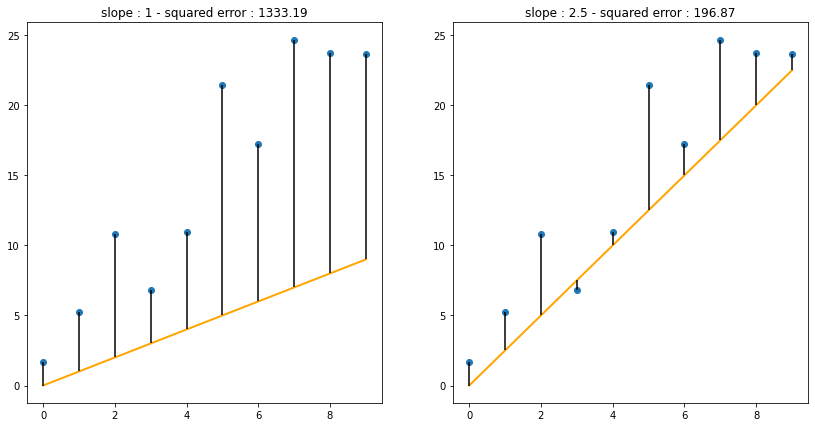

In [13]:
from matplotlib import collections  as mc

## let's create some data to plot
slopeReal = 3
noise = 3
x = np.arange(10)
y = slopeReal * x + noise * np.random.randn(len(x)) # y = beta * x + some noise (no intercept here)
## alternatively we could have:
# x= df['shoe_size'] 
# y= df['height']
## although note that in that case we also need an intercept. you can try 70



# The challenge of least square regression is to find the slope that minimizes the squared error
# let's try two possible values for the slope 
estimatedSlopes = [1,2.5]

fig, ax = plt.subplots(ncols=len(estimatedSlopes) , figsize = (14,7))

for i,slopeEstimate in enumerate(estimatedSlopes):
    yPredicted = slopeEstimate * x # prediction of y given the estimated slope and values of x

    # error of the prediction
    predictionSquaredError = sum( ( yPredicted - y )**2 )

    ax[i].plot(x,y, 'o')
    ax[i].plot(x,yPredicted, color='orange' , linewidth=2)

    # now, let's represent the fitting error as segments between real and estimated values
    Real = [i for i in zip(x,y)]
    Predicted = [i for i in zip(x,yPredicted)]
    lc = mc.LineCollection(zip(Real,Predicted) , colors='black')
    ax[i].add_collection(lc)

    ax[i].set_title('slope : {} - squared error : {:.2f}'.format(slopeEstimate,predictionSquaredError) )


all the slopes tested [0.   0.06 0.12 0.18 0.24 0.3  0.36 0.42 0.48 0.54 0.6  0.66 0.72 0.78
 0.84 0.9  0.96 1.02 1.08 1.14 1.2  1.26 1.32 1.38 1.44 1.5  1.56 1.62
 1.68 1.74 1.8  1.86 1.92 1.98 2.04 2.1  2.16 2.22 2.28 2.34 2.4  2.46
 2.52 2.58 2.64 2.7  2.76 2.82 2.88 2.94 3.   3.06 3.12 3.18 3.24 3.3
 3.36 3.42 3.48 3.54 3.6  3.66 3.72 3.78 3.84 3.9  3.96 4.02 4.08 4.14
 4.2  4.26 4.32 4.38 4.44 4.5  4.56 4.62 4.68 4.74 4.8  4.86 4.92 4.98
 5.04 5.1  5.16 5.22 5.28 5.34 5.4  5.46 5.52 5.58 5.64 5.7  5.76 5.82
 5.88 5.94 6.  ]
slope estimate with the smallest error :  3.2399999999999998


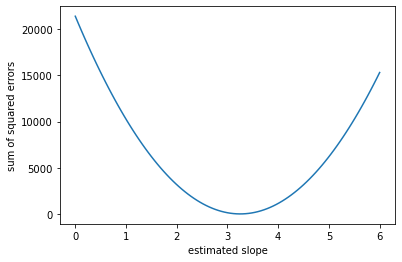

In [14]:
# to find the best value for the slope, we could try a lot of them :
possibleSlopes = np.linspace(0,6,101)
print('all the slopes tested',possibleSlopes)
errors = []
for sl in possibleSlopes: # we compute the sum of squared error for each slopes
    yPred = sl*x
    errors.append( sum( yPred - y )**2 )

plt.plot(possibleSlopes , errors )
plt.xlabel('estimated slope')
plt.ylabel('sum of squared errors')
print( 'slope estimate with the smallest error : ', possibleSlopes[np.argmin(errors)] )

While we could use various optimization algorithms to find the best value for $\beta$, 
when the system is overdetermined (*i.e.*, you have more points than coefficients $\beta_i$) an analytical solution exists. It is of the form:

$$\hat{\pmb\beta}=(\pmb X^T \pmb X)^{-1}\pmb X^T \pmb Y$$






[back to the toc](#toc)

<br>

## 2.2.Underlying hypothesis  <a id='9'></a>

There are a couple of important hypothesis behind this method:

- **Correct specification** : have a good incentive for the function you use
- **Strict exogeneity** : the errors are centered around the true value of y
- **No linear dependance** : you can not reconstruct one of your covariable by summing a subset of your covariables with some set of constant weights 
- **Spherical errors**: 
    - Homoskedasticity : the spread of the error is the same along the curve (for example not true for counts data).
    - No autocorrelation : error are not correlated along the curve.

Text(0.5, 1.0, 'heteroskedasticity')

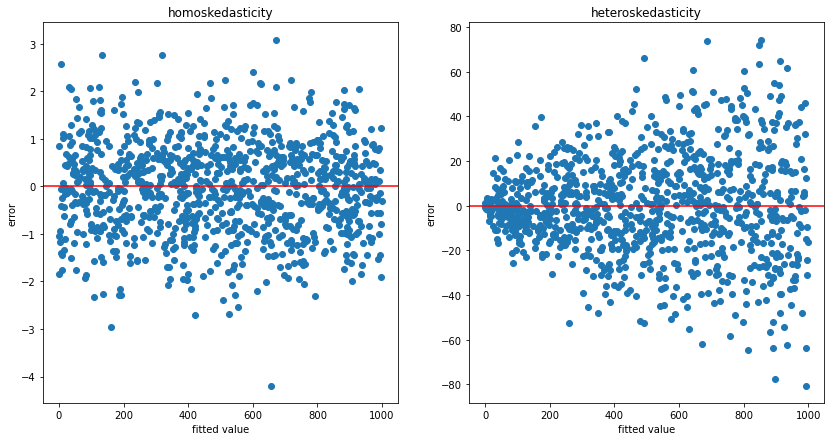

In [62]:
x = np.random.random(1000)*1000
y_homo = x + np.random.randn(*x.shape)
y_hete = np.random.poisson(lam=x)

y_error_homo = y_homo - x
y_error_hete = y_hete - x

fig,ax = plt.subplots(1,2,figsize=(14,7))
ax[0].scatter(x,y_error_homo)
ax[0].axhline(y=0,color='red')
ax[0].set_xlabel("fitted value")
ax[0].set_ylabel("error")
ax[0].set_title("homoskedasticity")

ax[1].scatter(x,y_error_hete)
ax[1].axhline(y=0,color='red')
ax[1].set_xlabel("fitted value")
ax[1].set_ylabel("error")
ax[1].set_title("heteroskedasticity")


The linear dependance part has to do with the part of the exercise where I clustered highly correlated covariables together. If you want to produce a good model for prediction then be carefull about that point. You can have a feeling of what the problem is by imagining that 2 covariables are actually copy pasta of each other : there is not unique way to associate a weight to them... Also then you have 1 variable which bring nothing new to the modeling... so kind of worthless. This is why later on I will ask you to work on a restricted part of the covariables.

If your goal is not really to produce a predictive model but more to infer the size effect of some covariables on your target variable, then it is not too crucial. Just remember that if this is what you want there are other steps to take, that are far beyond the scope of this course, and which are related to the field of causal inference

Normality is not strictly needed for Least Square fitting, neither for the variables nor for their errors. 
However you may need that hypothesis downstream in your analysis, for instance when using a test statistic.

If you errors are normally distributed, then Least Square fitting and Maximum Likelihood are equivalent, showing that your method for choosing $\pmb\beta$ is efficient and sound.

We will quickly present the Maximum Likelihood equivalent as it is both a very useful technic and helps broadening linear models to Generalized Linear Models.

Finally, within that set of constraints and even if the method is called Linear Models, it is possible to fit polynomials of a degree bigger than 1. To do so you just have to precompute the monomials and add them to your set of covariables.

For example :

$y=\beta x +c$ is a linear combination of x

$y=\beta_{1}x+\beta_{2}x^{2}+\beta_{3}x^{3}$ is still a linear combination of features (covariables) x, $x^{2}$ and $x^{3}$, and **X** becomes {$x,x^2,x^3$\}


[back to the toc](#toc)

<br>

## 2.3. Goodness of fit  <a id='10'></a>

To have an idea of how good your fit is, you can either directly use the Mean Squared Error (MSE) or the adjusted coefficient of determination $\pmb R^2_a$.

The MSE is defined as follow:

<br>

$$MSE=\frac{\sum (y_i-\hat{y_i})^2}{n-2}$$ 
and accounts for what your model is missing. 
That could be the simple inherent variance induced by the noise term or the noise term and a missing term that your model doesn't take into account. By its nature, this metric makes it hard to compare between different hypothetical fitting models or different dataset.

A better normalized metric is the **adjusted coefficient of determination $\pmb R^2_a$**. 
The adjusted part is very necessary when we work in the context of multiple linear regression (more than one covariable). 

Let's start by defining the coefficient of determination $\pmb R^2$. 
This coefficient partitions the variance present in your data between what is taken into account by your model and what is not.

$$R^2=1-\frac{SSE}{SST}$$, where SSE is the sum of squared errors ($\sum_i (y_i-\hat{y_i})^2$) and SST in the sum of squares total ($\sum_i (y_i-\bar{y})^2$)

For the adjusted coefficient of determination you have to take into account that SSE and SST don't have the same degree of freedom and you should adjust for that.

$$R^2_a=1-\frac{n-1}{n-p}(1-R^2)$$, with $p$ the number of covariables and $n$ the number of individuals.

> Note : you can see that when there is only one covariable then $R^2_a = R^2$

[back to the toc](#toc)

<br>

## 2.4. Confidence interval and test statistics  <a id='11'></a>

After your fitting, you would probably like to know the confidence interval for each of your estimated $\beta$, as well as if they are truly necessary (significantly different from zero). 
For both **you can't truly do anything without making an hypothesis about the statistic of the noise** : here comes the part where assuming your noise to be normally distributed ($N(0,\sigma^2)$) becomes important, but potentially wrong too.

For the confidence interval, if you have an infinite amount of data, and your noise distribution is not heavytailed, you can show that the estimators are well described by a normal statistic (there is convergence in the distribution so that $(\hat{\pmb\beta}-\pmb\beta)\rightarrow N(0,\sigma^2 (\pmb X^T \pmb X)^{-1})$). 
So for big amount of points relative to the number of estimated parameters, you are not making a big mistake by writting:

$$\beta_p \in [\hat{\beta_p} \pm z_{1-\frac{\alpha}{2}}\sqrt{\hat{\sigma}^2 [(\pmb X^T \pmb X)^{-1}]_{p,p}}]$$

If you don't have a huge amount of data you need to show that you have an incentive about your noise statistic to use these kind of confidence intervals (some libraries that we are going to use can do that for you!).


For the significance of the coefficients, **if you know that your noise is normally distributed then you can use a t-test**.


[back to the toc](#toc)

<br>

### Examples:  some linear regression examples 

#### Affine

This is typically the case where we would like to describe height = $\beta$ shoe_size + c

Here we look at a model y=1+3*x

epsilon 0
fit param c= 1.000 beta= 3.000
true param c= 1.000 beta= 3.000

epsilon 1
fit param c= 0.989 beta= 3.008
true param c= 1.000 beta= 3.000

epsilon 10
fit param c= 1.780 beta= 6.182
true param c= 1.000 beta= 3.000



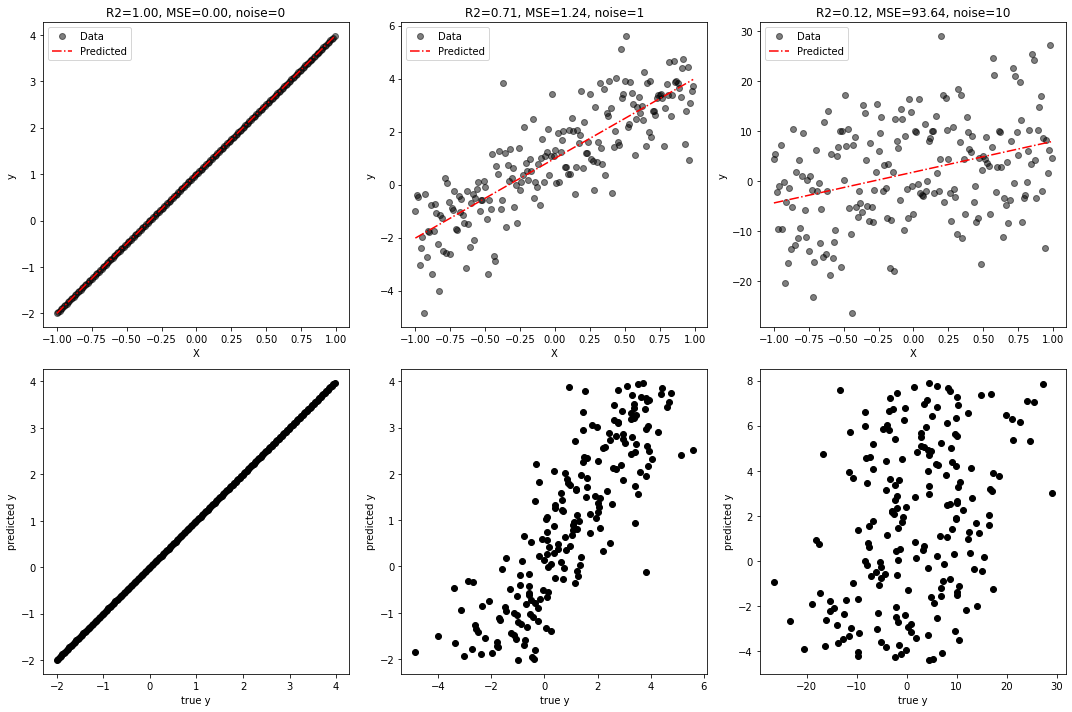

In [17]:
import statsmodels
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

X=np.array(np.arange(-1,1,10**-2))
fig,ax=plt.subplots(2,3,figsize=(15,10))

for k,epsilon in enumerate([0,1,10]):
    
    y = 1+3*X + epsilon* np.random.randn(  len(X) )
    
    ## creating a dataframe with the data
    X1 = sm.add_constant(X)##adding the intercept    
    df_=pd.DataFrame(X1,columns=['c','x'])
        
    model = sm.OLS( y , df_[['c','x']])##defining an Ordinary Least Square variable
    results = model.fit()##fitting it
    y_predict=results.predict(X1)# predict back what your target variable would be in that model
    R2=r2_score(y,y_predict)#evaluate R2
    MSE=mean_squared_error(y,y_predict)#evaluate MSE

    ## plotting the data and model
    ax[0,k].plot(X,y,'ko',label='Data',linewidth=10,alpha=0.5)
    ax[0,k].plot(X,y_predict,'r-.',label='Predicted')
    ax[0,k].legend(loc='best',fontsize=10)
    ax[0,k].set_title('R2={0:.2f}, MSE={1:.2f}, noise={2}'.format(R2,MSE,epsilon))
    ax[0,k].set_xlabel('X')
    ax[0,k].set_ylabel('y')
    
    ## plotting predicted value versus real value is a good way to visualize a fit
    ax[1,k].plot(y,y_predict,'ko')
    ax[1,k].set_xlabel('true y')
    ax[1,k].set_ylabel('predicted y')
    print('epsilon',epsilon)
    print('fit param c= {0:.3f} beta= {1:.3f}'.format(results.params['c'],results.params['x']))
    print('true param c= {0:.3f} beta= {1:.3f}'.format(1,3))
    print()
plt.tight_layout()
plt.show()
    
    

Let's see what happened if we miss specify the polynomial degree :

epsilon 0
fit param c= 1.000 beta1= 3.000 beta2= 0.000 beta3= -0.000
true param c= 1.000 beta= 3.000

epsilon 1
fit param c= 0.992 beta1= 3.389 beta2= 0.178 beta3= -0.682
true param c= 1.000 beta= 3.000

epsilon 10
fit param c= 1.250 beta1= 0.962 beta2= -0.318 beta3= 3.481
true param c= 1.000 beta= 3.000



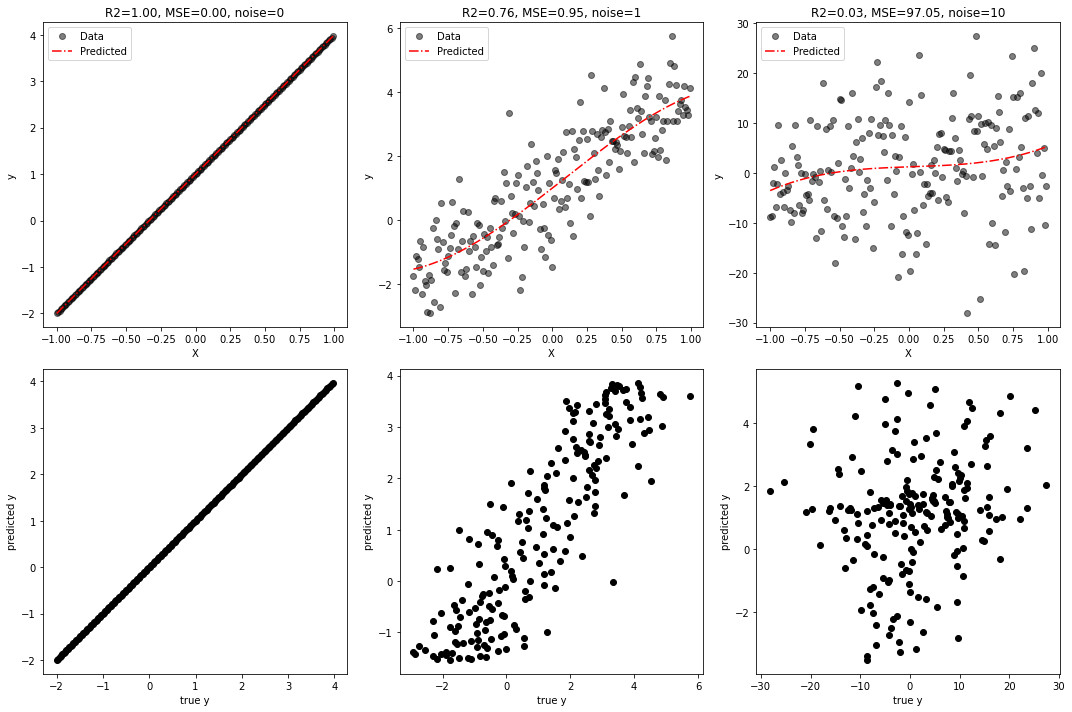

In [16]:
X=np.array(np.arange(-1,1,10**-2))
fig,ax=plt.subplots(2,3,figsize=(15,10))

for k,epsilon in enumerate([0,1,10]):

    y = 1+3*X + epsilon* np.random.randn(  len(X) )
    
    X1 = np.column_stack((X, X**2,X**3))
    X1 = sm.add_constant(X1)##adding the intercept
    
    df_=pd.DataFrame(X1,columns=['c','x','x²','x³'])
    
    model = sm.OLS( y , df_[['c','x','x²','x³']])##defining an Ordinary Least Square variable
    results = model.fit()##fitting it
    y_predict=results.predict(X1)# predict back what your target variable would be in that model
    R2=r2_score(y,y_predict)#evaluate R2
    MSE=mean_squared_error(y,y_predict)#evaluate MSE


    ax[0,k].plot(X,y,'ko',label='Data',linewidth=10,alpha=0.5)
    ax[0,k].plot(X,y_predict,'r-.',label='Predicted')
    ax[0,k].legend(loc='best',fontsize=10)
    ax[0,k].set_title('R2={0:.2f}, MSE={1:.2f}, noise={2}'.format(R2,MSE,epsilon))
    ax[0,k].set_xlabel('X')
    ax[0,k].set_ylabel('y')
    
    ax[1,k].plot(y,y_predict,'ko')
    ax[1,k].set_xlabel('true y')
    ax[1,k].set_ylabel('predicted y')
    print('epsilon',epsilon)
    print('fit param c= {0:.3f} beta1= {1:.3f} beta2= {2:.3f} beta3= {3:.3f}'.format(results.params['c'],results.params['x'],results.params['x²'],results.params['x³']))
    print('true param c= {0:.3f} beta= {1:.3f}'.format(1,3))
    print()
plt.tight_layout()
plt.show()

On the height datset

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     89.30
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           2.97e-12
Time:                        17:45:54   Log-Likelihood:                -142.98
No. Observations:                  47   AIC:                             290.0
Df Residuals:                      45   BIC:                             293.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.8975     10.550      6.910      0.0

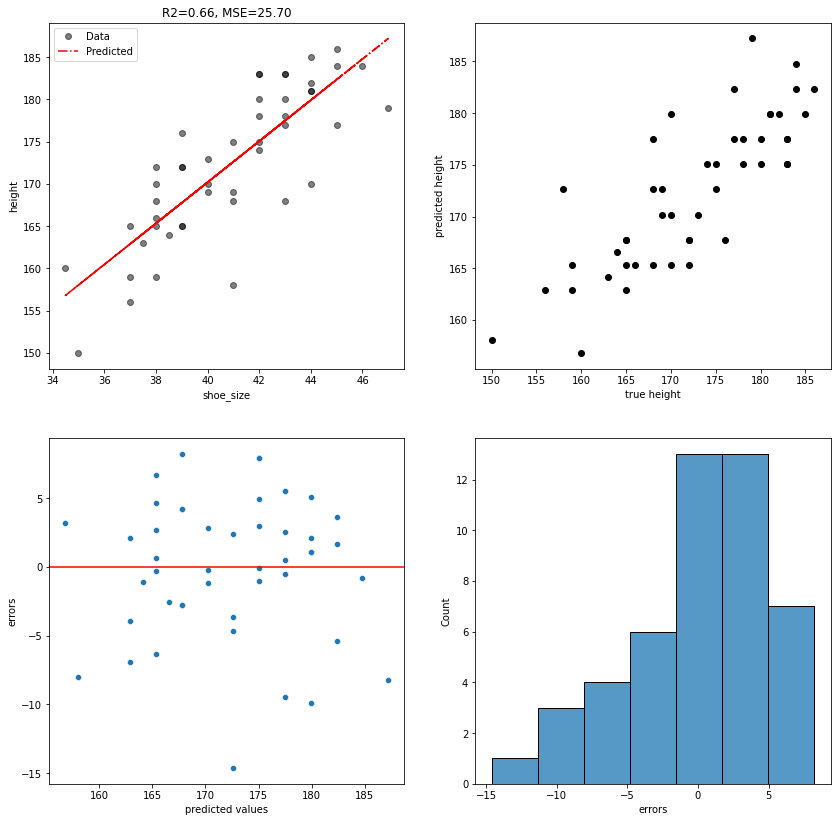

In [38]:
import statsmodels.formula.api as smf
model = smf.ols(formula='height ~ shoe_size', data=df)

results = model.fit()#we do the actual fit
y_predict=results.predict(df)# predict back what your target variable would be in that model
R2=r2_score(df['height'],y_predict)
MSE=mean_squared_error(df['height'],y_predict)


fig , ax = plt.subplots(2,2, figsize=(14,14))

O = np.argsort(df['height'])
ax[0][0].plot(df['shoe_size'],df['height'],'ko',label='Data',linewidth=10,alpha=0.5)
ax[0][0].plot(df['shoe_size'][O],y_predict[O],'r-.',label='Predicted')
ax[0][0].legend(loc='best',fontsize=10)
ax[0][0].set_title('R2={0:.2f}, MSE={1:.2f}'.format(R2,MSE))
ax[0][0].set_xlabel('shoe_size')
ax[0][0].set_ylabel('height')
  

ax[0][1].plot(df['height'],y_predict,'ko')
ax[0][1].set_xlabel('true height')
ax[0][1].set_ylabel('predicted height')

sns.scatterplot(x=y_predict,y=results.resid , ax=ax[1][0]) # plot the errors along x
ax[1][0].axhline(0,color='red')
ax[1][0].set_ylabel('errors')
ax[1][0].set_xlabel('predicted values')
sns.histplot(results.resid , ax=ax[1][1]) # plot an histogram of the errors
ax[1][1].set_xlabel('errors')

print(results.summary())
print(results.resid.describe())

Let's go at these panels one by one.

In [20]:
print(res.tables[0])

                             OLS Regression Results                            
Dep. Variable:     disease_progression   R-squared:                       0.344
Model:                             OLS   Adj. R-squared:                  0.342
Method:                  Least Squares   F-statistic:                     230.7
Date:                 Tue, 30 Nov 2021   Prob (F-statistic):           3.47e-42
Time:                         09:41:58   Log-Likelihood:                -2454.0
No. Observations:                  442   AIC:                             4912.
Df Residuals:                      440   BIC:                             4920.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         


The first panel gives you an overview of the fit quality:
* You recognize the good old **$R^2$** and **$R_a^2$**
* The **F-statistic** and its associated P-value (**Prob (F-statistic)**) tests the hypothesis that all the coefficients are 0 (under a normality assumption)
* **Log-likelihood** (normality assumption + this is the next big part so keep it on a corner of your mind)
* AIC and BIC, respectively **Aikike Information Criterion** and **Bayesian Information Criterion** are used (like the log-likelihood) for model comparison. You can use them to compare non nested models. However they are, from my point of view less interpretable in the sense of what a threshold that you will put on those criterion means.

In [21]:
print(res.tables[1])

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.974     51.162      0.000     146.289     157.978
bmi          949.4353     62.515     15.187      0.000     826.570    1072.301


The second panel presents the coefficient values and associated statistics.
 * **const** is the intercept. It represents the value of the response variable when all covariable are at 0.
 * **bmi** is the coefficient of the $bmi$. It represents the increase of the response variable when $bmi$ increases by 1.

Regarding the columns:
 * **std err** : standard errors of the estimated coefficients.
 * **t** : t-test statistics.
 * **P>|t|** : p-values of the t-test testing if the coefficient is significantly different from 0.
 * **\[0.025 0975\]** : 95% condidence interval aournd the coefficient

Be careful with this **t-test which again makes the assumption that errors are normally distributed**, same for the standard error and the 95% confidence interval.

In [22]:
print(res.tables[2])

Omnibus:                       11.674   Durbin-Watson:                   1.848
Prob(Omnibus):                  0.003   Jarque-Bera (JB):                7.310
Skew:                           0.156   Prob(JB):                       0.0259
Kurtosis:                       2.453   Cond. No.                         21.0


The third panel is a summary of a few statistical tests that will give you a sense of how all of the hypothesis needed for OLS are plausible:
* **Omnibus and Prob(omnibus)**: this is a test for normality of residuals. Low P-values means that your linear model is not adapted
* **Durbin-Watson** : tests autocorrelation in the error terms (2 is no autocorrelation, less than 1 is bad)
* **Jarque-Bera** : tests if the [skewness](https://en.wikipedia.org/wiki/Skewness) and [kurtosis](https://en.wikipedia.org/wiki/Kurtosis) of your errors are looking like a normal distribution. If the Pvalue is high then they look normal.
* **Condition Number** : tries to evaluate dependence between the co-variables. Close to infinity ($\gt 10^{15}$) mean there is a linear relationship between some co-variables (you can read more on this [here](https://medium.com/@docintangible/multicollinearity-in-pythons-statsmodels-ols-vs-r-s-lm-6fc9a994154c))

There is one important hypothesis of OLS which is missing from this summary : **homoskedasticity**.

Thankfully, statsmodels provide several tests for this as well, we will use White's test, whose null hypothesis is homoscedasticity:

In [30]:
from statsmodels.stats.diagnostic import het_white

LMstat , LMpval , Fstat , Fpval = het_white( results.resid , model.data.exog )
print("White test for heteroscedasticity p-value:" , LMpval)

White test for heteroscedasticity p-value: 0.9369363029340625


**Mini-exercise : what is your conclusion on the $shoe\_size$ model based on these results ?**

#### Unidimensional, multiple covariables

This is typically the case where we would like to describe $\text{height}$ = $\beta_1$ $shoesize$ +$\beta_2$ $shoesize^2$ +$\beta_3$ $shoesize^3$+c


Here we look at a model y=1-3*x+6*x^3

epsilon 0
fit param c= 1.000 beta1= -3.000 beta2= -0.000 beta3= 6.000
true param c= 1.000 beta1= -3.000 beta2= 0.000 beta3= 6.000

epsilon 1
fit param c= 0.935 beta1= -2.952 beta2= 0.260 beta3= 6.230
true param c= 1.000 beta1= -3.000 beta2= 0.000 beta3= 6.000

epsilon 10
fit param c= 0.550 beta1= -3.700 beta2= -0.312 beta3= 5.181
true param c= 1.000 beta1= -3.000 beta2= 0.000 beta3= 6.000



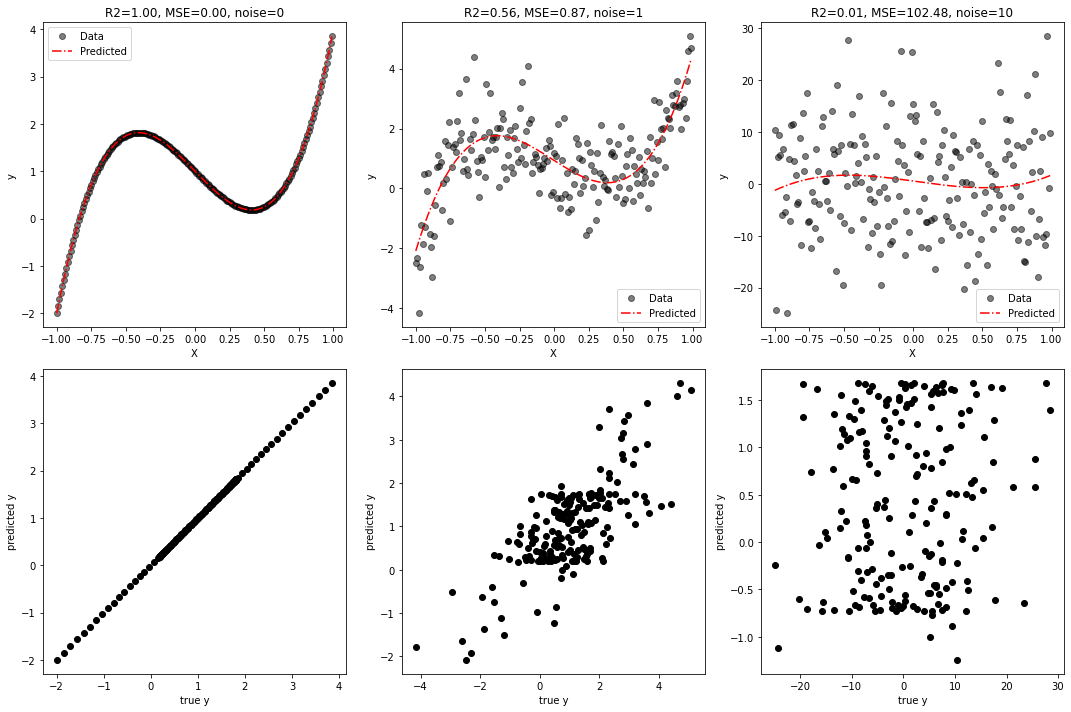

In [31]:
X=np.array(np.arange(-1,1,10**-2))
fig,ax=plt.subplots(2,3,figsize=(15,10))

for k,epsilon in enumerate([0,1,10]):
    y = 1-3*X+6*X**3 +epsilon*np.random.randn(len(X))

    
    X1 = np.column_stack((X, X**2,X**3))
    X1 = sm.add_constant(X1)##adding the intercept
    
    df_=pd.DataFrame(X1,columns=['c','x','x²','x³'])
    
    model = sm.OLS( y , df_[['c','x','x²','x³']])##defining an Ordinary Least Square variable
    results = model.fit()##fitting it
    y_predict=results.predict(X1)# predict back what your target variable would be in that model
    R2=r2_score(y,y_predict)#evaluate R2
    MSE=mean_squared_error(y,y_predict)#evaluate MSE


    ax[0,k].plot(X,y,'ko',label='Data',linewidth=10,alpha=0.5)
    ax[0,k].plot(X,y_predict,'r-.',label='Predicted')
    ax[0,k].legend(loc='best',fontsize=10)
    ax[0,k].set_title('R2={0:.2f}, MSE={1:.2f}, noise={2}'.format(R2,MSE,epsilon))
    ax[0,k].set_xlabel('X')
    ax[0,k].set_ylabel('y')
    
    ax[1,k].plot(y,y_predict,'ko')
    ax[1,k].set_xlabel('true y')
    ax[1,k].set_ylabel('predicted y')
    print('epsilon',epsilon)
    print('fit param c= {0:.3f} beta1= {1:.3f} beta2= {2:.3f} beta3= {3:.3f}'.format(results.params['c'],results.params['x'],results.params['x²'],results.params['x³']))
    print('true param c= {0:.3f} beta1= {1:.3f} beta2= {2:.3f} beta3= {3:.3f}'.format(1,-3,0,6))
    print()
plt.tight_layout()
plt.show()

On the real data, eventhough you probably have no reason to model it with something else than a degree 1 polynomial

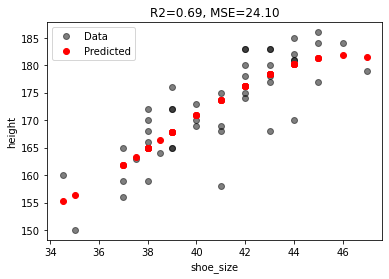

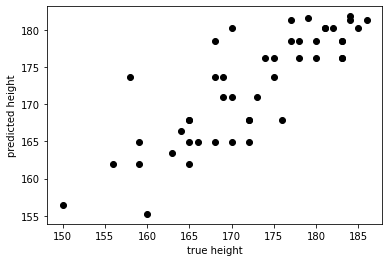

fit param for shoe_size  1001.5314606143329
fit intercept  -71.35335992728096



In [32]:
df_extended=df.copy()
df_extended['shoe_size2']=df['shoe_size']**2
df_extended['shoe_size3']=df['shoe_size']**3
model = smf.ols(formula='height ~ shoe_size + shoe_size2 + shoe_size3', data=df_extended)

results = model.fit()#we do the actual fit
y_predict=results.predict(df_extended)# predict back what your target variable would be in that model
R2=r2_score(df_extended['height'],y_predict)
MSE=mean_squared_error(df_extended['height'],y_predict)

plt.plot(df_extended['shoe_size'] , df_extended['height'] ,'ko',label='Data',linewidth=10,alpha=0.5)
plt.plot(df_extended['shoe_size'] , y_predict ,'ro',label='Predicted')
plt.legend(loc='best',fontsize=10)
plt.title('R2={0:.2f}, MSE={1:.2f}'.format(R2,MSE))
plt.xlabel('shoe_size')
plt.ylabel('height')
plt.show()    

plt.plot( df_extended['height'], y_predict,'ko')
plt.xlabel('true height')
plt.ylabel('predicted height')
plt.show()
print('fit param for shoe_size ',results.params['Intercept'])
print('fit intercept ', results.params['shoe_size'])

print()

#### Multidimensional : more than 1 co-variable

Let see what that look like with our dataset

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     52.97
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.93e-12
Time:                        17:47:11   Log-Likelihood:                -139.86
No. Observations:                  47   AIC:                             285.7
Df Residuals:                      44   BIC:                             291.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5602     19.324      1.633      0.1

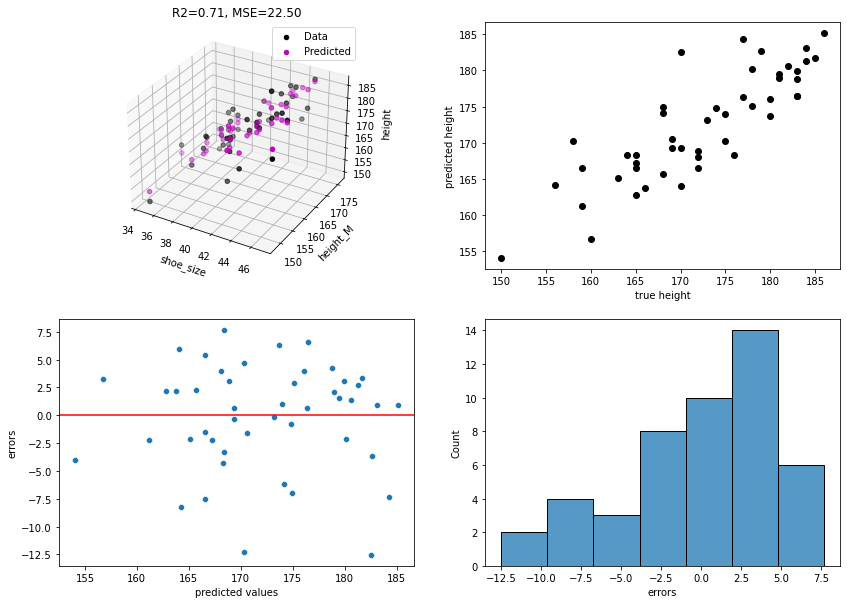

In [39]:
model = smf.ols(formula='height ~ shoe_size+height_M', data=df)

results = model.fit()#we do the actual fit
y_predict=results.predict(df)# predict back what your target variable would be in that model
R2=r2_score(df['height'],y_predict)
MSE=mean_squared_error(df['height'],y_predict)

fig = plt.figure(figsize=(14,10))
ax = fig.add_subplot(221, projection='3d')
ax.scatter(df['shoe_size'], df['height_M'], df['height'], s=20, c='k',label='Data', depthshade=True)

ax.scatter(df['shoe_size'], df['height_M'],y_predict,label='Predicted' ,color='m')
ax.legend(loc='best',fontsize=10)
ax.set_title('R2={0:.2f}, MSE={1:.2f}'.format(R2,MSE))
ax.set_xlabel('shoe_size')
ax.set_ylabel('height_M')
ax.set_zlabel('height')

ax = fig.add_subplot(222)
ax.plot(df['height'],y_predict,'ko')
ax.set_xlabel('true height')
ax.set_ylabel('predicted height')

ax = fig.add_subplot(223)
sns.scatterplot(x=y_predict,y=results.resid , ax=ax) # plot the errors along x
ax.axhline(0,color='red')
ax.set_ylabel('errors')
ax.set_xlabel('predicted values')
ax = fig.add_subplot(224)
sns.histplot(results.resid , ax=ax) # plot an histogram of the errors
ax.set_xlabel('errors')


print(results.summary())

Stats model gives you way more info than just a predicition and your fitted parameters. But to really use those info that we will see later on, we need to introduce some other stuff first.

## 2.5. Maximum Likelihood  <a id='12'></a>

Maximum Likelihood is a method that is used to estimate parameters of a probablililty distribution, and is useful for model selection. It is done by maximizing the likelihood function. In the case that we are interested in (i.e. independant identically distributed) this likelihood function is simply the product of  a density function values over the entire sample. It is a parametric method since it needs to have an a priory about the density function for it to work. Since it is a product, most of the time we would rather work with the log likelihood function which transforms this product into a sum.

So we would like to maximize $l$, the loglikelihood function, by choosing a set of parameters $\Theta$.
Where $l$ is of the form:

$l(\Theta;Y)=\sum_i ln(p(y_i|\Theta))$

Where $Y$ is a random variable and $p()$ is the density function associated to $Y$.So you want to find the following estimation for $\pmb\Theta$

$$\hat{\pmb\Theta}=\text{arg max}_{\pmb\Theta}l(\pmb\Theta;Y)$$




### What are we looking at?

Let's take the example of a gaussian where you would like to estimate the $\sigma$ and the $\mu$, given your data. As they are simulated data we chose that $\mu=2$ and $\sigma=0.5$

In [21]:
def gaussian_dist(x,mu,sigma):
    """ returns the probability of observing x in a normal distribution of mean mu and standard deviation sigma """
    return 1./(sigma*np.sqrt(2*np.pi))*np.exp(-1./(2*sigma**2)*(x-mu)**2)
    # note : this is equivalent to stats.norm.pdf( x , mu , sigma )

the data that we observed [2.0705559019954776, 1.007463415334207, 2.0456545793620444, 2.0263769363203794, 2.317684131093216, 2.3051591597481824, 2.6714537527965647, 2.4203844635346545, 1.88455100679846, 1.5768107647354324]


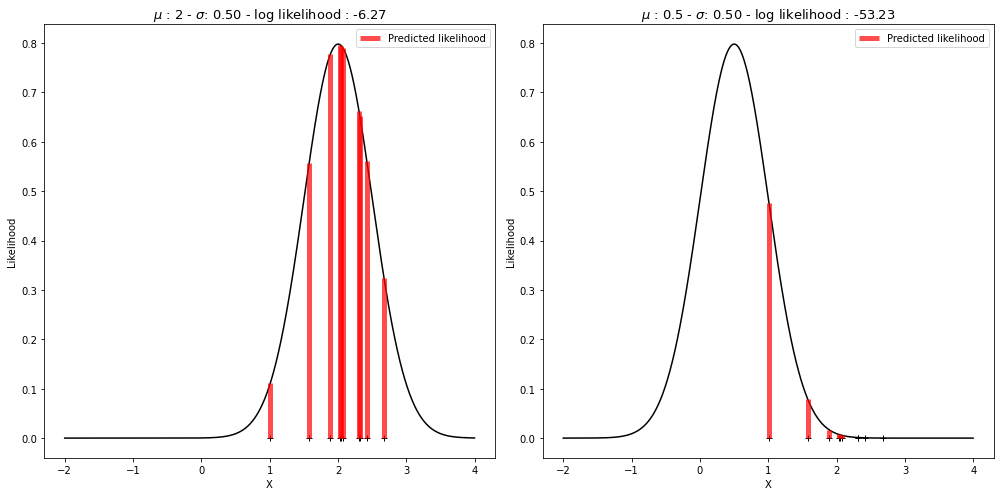

In [22]:
X_small=np.random.randn(10)*0.5+2 # this is our observed data, with ( mean=2 , sd=0.5 )

m=[2,0.5] # we will try 2 possible combinations of paramters ( mean=2 , sd=0.5 ) and ( mean=0.5 , sd=0.5 ) 
s=[0.5,0.5]


fig, ax = plt.subplots(ncols=len(m) , figsize = (14,7))
X_small_=[[v,0] for v in X_small]

x=np.arange(-2,4,0.005) # we will plot between -2 and 4

print('the data that we observed',[v[0] for v in X_small_])

for q in range(len(m)): # for each of the parameter combinations we want to try
    ax[q].plot(X_small,[0]*len(X_small),'k+') # we plot the observed data as crosses

    ax[q].plot( x , stats.norm.pdf( x , loc = m[q] , scale = s[q] ),'k') # we plot the distribution we are testing
    
    Predicted = stats.norm.pdf( X_small , loc = m[q] , scale = s[q] )

    Predicted_= [i for i in zip(X_small,Predicted)] # this is to plot segments
    lc = mc.LineCollection(zip(X_small_,Predicted_) , colors='red',linewidths=5,alpha=0.7,label='Predicted likelihood')
    ax[q].add_collection(lc)
    ax[q].legend(loc='best',fontsize=10)
    
    # the log likelihood of this set of parameters is the sum of the log of the probability densities of the sample
    sum_like=sum(np.log(Predicted))     
    ax[q].set_title('$\mu$ : {} - $\sigma$: {:.2f} - log likelihood : {:.2f}'.format(m[q],s[q],sum_like) ,fontsize=13)
    
    ax[q].set_xlabel('X')
    ax[q].set_ylabel('Likelihood')


plt.tight_layout()    

Multiplying those red bars is exactly what the maximum likelihood does. 

Basically, you shift your theoritical distribution to the right or the left (trying different means), and you narrow it or widen it (trying different variances). 

For each of those try you multiply those red bars together, and the combination of parameters giving highest result is the one maximizing the likelihood of your data being produced by that distribution with those parameters.


It is important to point out here that **even when our data are actually coming from a certain distribution, there will (almost) always be a difference between the theoretical distribution and the recovered one**, as to have perfect match you would need an infinite number of data points.

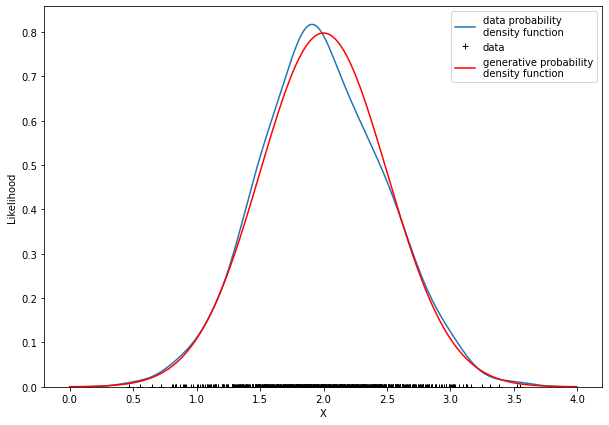

In [23]:
X=np.random.randn(800)*0.5+2
fig = plt.figure(figsize = (10,7)) 
sns.kdeplot(X,label='data probability\ndensity function')
x=np.arange(0,4,0.005)
plt.plot(X,[0]*len(X) ,'k+',label='data')
plt.plot(x, stats.norm.pdf( x , loc = 2 , scale = 0.5 ) ,'r',label='generative probability\ndensity function')
plt.ylabel('Likelihood')
plt.xlabel('X')
plt.legend(loc='best',fontsize=10)

Let's test many combinations of possible means and standard deviations to see where our maximum of likelihood lies.

Highest likelihood is for \mu and \sigma : 2.0 0.5


/tmp/ipykernel_1484/1821976447.py:30: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


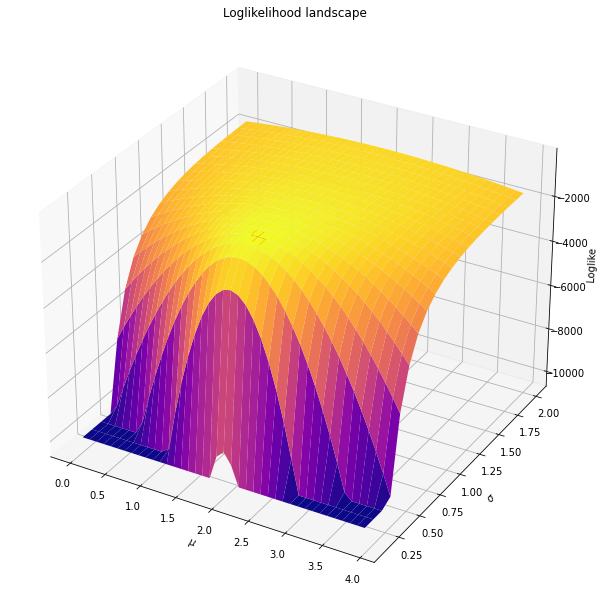

In [24]:
import math

mu=np.arange(0,4,0.1) # from 0 to 4 by increments of 0.1
sigma=np.arange(0.1,2.1,0.1) # from 0.1 to 2.1 by increments of 0.1

mu,sigma=np.meshgrid(mu,sigma) # this useful function combines all possibles values for mu and sigma
def loglike_func(X,mu,sigma):
    """returns a list of the loglikelihoods of mus and sigmas given data X"""
    ll = []
    for i in range(len(mu)):
        ll.append( sum(np.log(stats.norm.pdf(X,mu[i],sigma[i]))) )
        if math.isnan(ll[-1]) or ll[-1] < -10000: 
            ll[-1] = -10000 # we verify that no numerical error gave us an NaN or very small log value
    return ll

# we compute the log-likelihood for all tested parameters values 
zs=np.array(
    loglike_func(X,np.ravel(mu),np.ravel(sigma))
) 
loglike=zs.reshape(mu.shape)

bestMu = np.ravel(mu)[np.argmax(zs)]
bestSigma = np.ravel(sigma)[np.argmax(zs)]

# make a 3D figure of our loglikelihood landscape
from mpl_toolkits.mplot3d import Axes3D 
print(r'Highest likelihood is for \mu and \sigma :',bestMu,bestSigma)

fig = plt.figure(figsize=(14,8)) 
ax = Axes3D(fig)
ax.plot_surface(mu,sigma,loglike,cmap='plasma') 
ax.scatter(bestMu,bestSigma,max(zs),s=200,c='r') # put a dot at the ML value
ax.set_xlabel('$\mu$')
ax.set_ylabel('$\sigma$')
ax.set_zlabel('Loglike')
plt.title("Loglikelihood landscape")

plt.show()

### What is the link between OLS and maximum likelihood (optional but a good gateway to understand GLM)

Let's now imagine that we try to fit the average of a Y, $\bar{Y}$, along the curve $\bar{Y}=\beta X+c$ for which the noise around those averages is gaussian. Since we didn't put the noise in this equality, thus it really represents a fit of the average of Y. The equation representing the fitting of Y would be $Y=\beta X+c+\epsilon$. We could thus consider that we can switch to the following problem of distribution fitting, defined by the density function:

$$p(y_i|\bar{y_i},\sigma)=\frac{1}{\sqrt{2\pi\sigma^2}}*\exp(-\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2})$$

Note that the parameters you want to estimate are $\bar{y_i}$ and $\sigma$.

By definition of the  likelihood function over $n$ individuals in a sample is:

$$\Pi_i \frac{1}{\sqrt{2\pi\sigma^2}}*\exp(-\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2})$$

which transformed into the loglikelihood function:

$$l(\bar{y_i},\sigma;Y) = \sum_i -\frac{1}{2}\frac{(y_i-\bar{y_i})^2}{\sigma^2} + constant$$

Now let's rewrite $\bar{y_i}=\beta x_i+c=f(x_i,\beta)$. So now the game is to find $\beta$ and $c$.

You see now that maximizing $\sum_i -(y_i-f(x_i,\beta))^2$ over $\beta$ is the same than minimizing $\sum_i (y_i-f(x_i,\beta))^2$ over $\beta$(which is what we wrote for Ordinary Least Square)

[back to the toc](#toc)

<br>

## 2.6. Model choosing  <a id='13'></a>

Most of the time you are not sure of the model you want to fit. You might have a broad idea of the different forms of the function but you don't really know for example what would be the best degree for your poynomial or if all the covariables are actually necessary. Of course you could say "I am keeping the model that fit the best in term of $R^2$". But the question really is : is that bunch of extra parameters that are complexifying my model worth the increase in $R^2$?

We touched that question in 1.4 by asking about the significance of parameters values. Again if you are confident on the noise distribution you are dealing with (let's say it is normally distributed), and you have a function in mind but you don't know if you should include 1,2 or $p$ covariables then the problem is easy: you can use a log-likelihood ratio test.


### Likelihood ratio test (LRT)


To perform a likelihood ratio test you just have to calculate the difference between the maximised log-likelihood of the two models you are comparing. You can estimate the significance of that difference either by using a test statistic (approximate method) or by simulation.

LRT are to be used in the case of nested function comparison. Nested functions are functions that have the same form but differ from the number of parameters used : for example comparing $y=\beta_1 x_1 +c$ and $y=\beta_1 x_1 +\beta_2 x_2 +c$. In this course this will always be the case (but just remember that outside of this course you might want to do other comparison, so be carefull).

Quickly :

You want to compare model $M_0$ and $M_1$, respectively having $\{\beta_{1,0}\}$ and $\{\beta_{1,2},\beta_{2,2}\}$ as parameters. You want to see if adding this extra parameter $\beta_{2,2}$ is worth it.

The LRT statistics is :

$2*(l(Y;\hat{\beta}_{1,2},\hat{\beta}_{2,2},X)-l(Y;\hat{\beta}_{1,0},X))$

Where the hat represents the maximum likelihood estimates. The LRT statistic asymptoptically, for your sample size going to infinity, follows a **chi-square distribution with a number of degree of freedom equal to the difference between the number of degrees of freedom in your models**. You have thus access to a P-value which will help you to decide if complexifying your model is worth it.

To calulate this P-value you can use 1-scipy.stats.chi2.cdf(LRT,$df_{M_1}-df_{M_0}$), where $df$ is the number of degree of freedom of the models.

#### Stats model on etubiol dataset

let's see how that work on real data: let's say we want to predict height using the height of the mother (`height_M`) and and shoe size.

let's check with only shoe_size

In [43]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

model1 = smf.ols(formula='height ~  shoe_size', data=df)
results_model1 = model1.fit()#we do the actual fit

res=results_model1.summary()#we print the summary

print(res)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     89.30
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           2.97e-12
Time:                        17:54:59   Log-Likelihood:                -142.98
No. Observations:                  47   AIC:                             290.0
Df Residuals:                      45   BIC:                             293.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     72.8975     10.550      6.910      0.0

let's add one more covariable

In [45]:
model2 = smf.ols(formula='height ~ shoe_size + height_M', data=df)

results_model2 = model2.fit()#we do the actual fit

res=results_model2.summary()#we print the summary

print(res)

                            OLS Regression Results                            
Dep. Variable:                 height   R-squared:                       0.707
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     52.97
Date:                Fri, 17 Jun 2022   Prob (F-statistic):           1.93e-12
Time:                        17:55:12   Log-Likelihood:                -139.86
No. Observations:                  47   AIC:                             285.7
Df Residuals:                      44   BIC:                             291.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.5602     19.324      1.633      0.1

In [47]:
print('loglikelihood model shoe_size:', results_model1.llf )
print('loglikelihood model shoe_size + mother height:',results_model2.llf)

loglikelihood model shoe_size: -142.9798088236663
loglikelihood model shoe_size + mother height: -139.86193117610588


Adding the mother's height did increase the loglikelihood, is it significant enought for us to keep it for modelling?

In [48]:
LRT=2*(results_model2.llf - results_model1.llf)
print('The LRT statistics is ',LRT)
print('The associated pvalue to that difference of Log likelihood is', 1-stats.chi2.cdf(LRT,2-1))

The LRT statistics is  6.235755295120839
The associated pvalue to that difference of Log likelihood is 0.012519618597419568



[back to the toc](#toc)

<br>

## 2.7. What to do when some hypothesis about OLS are not true  <a id='14'></a>


When the homoscedasticity of your data is not true you have a few possibilities:
- you can transform your data so your data become homoscedastic (for example you could use variance stabilizing transformation, or a simple log transform or other...)
- you can change your loss function that we previously called $S(\beta)$ to reweight the different members of that equation by taking into account the discrepancy in terms of variance. That only works if there is no correlation between the error terms. In that case the method is called Weighted Least Square and it simply transformed to $S(\pmb\beta)=\sum_i \frac{1}{\sigma_i^2} (y_i-f(\textbf{X},\pmb{\beta}))^2$.
- if there is a correlation between the different error terms then it becomes more complicated, but technics exist such as Generalized Least Square model

Finally if you know  what statistics your measurement follow, you can bypass all of those problems (and encounter others :-)) by using a maximum likelihood estimation rather than an LS method. By doing so you will have to put yourself in the framework of Generalized Linear Models, which is outside of the scope of this course.


[back to the toc](#toc)

<br>

# Exercise 02  <a id='15'></a>


Using the following subset of covariables ['shoe_size','height_M','nb_siblings_F'] find the best model to predict height.


In [51]:
# %load solutions/solution_04_reg.py

**Final remark** : to actually have the best model I invite you to follow the practice of machine learning that is based in splitting your dataset, cross validation etc... What you have learn today is still an introduction. You are more ready than ever to do modelisation but be aware that many things still need to be done to have you derive a model following state of the art methodology.

### Annex : Regularization

If you don't have access to the noise properties (*i.e.* you have no good reason to say it is normally distributed), you can always use a technic called regularization which is going to penalize covariables that are not really important to your fit. This is more on the machine learning side, and so a lot should be said about how to properly use  this technic (splitting your dataset between train, validation and test set, *etc.*). 
But let's just check what the principle behind it is and I will give an additionnal example on it later on.

The only thing that this method does is to add a penalization term to the least square minimization method seen before. 
This penalization is based on the size of the parameters estimated. 
The rational is that some time, parameters estimated will be inflated to compensate the fact that the covariable is not really important to fit the data, but is rather important to understand the noise. So regularization minimizes square error while balancing the overall size of the parameters.

Broadly, it can looks like that:

* $S(\pmb{\beta}) + \frac{1}{C}\Sigma^{n}_{i=1}|\beta_{i}|$ , l1 regularization (Lasso) C being the inverse of the weight that you put on that regularization 

* $S(\pmb{\beta}) + \frac{1}{C}\Sigma^{n}_{i=1}\beta_{i}^{2}$ , l2 regularization (Ridge) 

* $S(\pmb{\beta}) + \frac{1}{C}\Sigma^{n}_{i=1}(\alpha|\beta_{i}|+(1-\alpha)\beta_{i}^{2})$ , elasticnet

How to choose this C, or sometime $\alpha$, is related to the field of machine learning and has to do with splitting your data set into train, validation and test sets. We will not go deeper than that but statsmodels has it implemented `statsmodels.regression.linear_model.OLS.fit_regularized` and scikitlearn, a python library specialized in machine learning has even more option. 

This is really just for culture, there are many more things to learn before applying those technics rigorously.